# ECON 441B - Assignment #9 

## Pregya Vijayakumar

# 0.) Import and Clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# importing the dataset
df = pd.read_csv("Country-data.csv", sep = ",")

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# creating our dataset which we will be using to conduct clustering
names = df['country'].copy()
X = df.drop(['country'], axis = 1)

In [5]:
# scaling the data
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [6]:
# fitting kmeans model on the scaled data
kmeans = KMeans(n_clusters = 5).fit(X_scaled)
kmeans.fit(X_scaled)

KMeans(n_clusters=5)

# 2.) Pick two features to visualize across

In [7]:
# checking for what columns we want to utilize to cluster the data
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

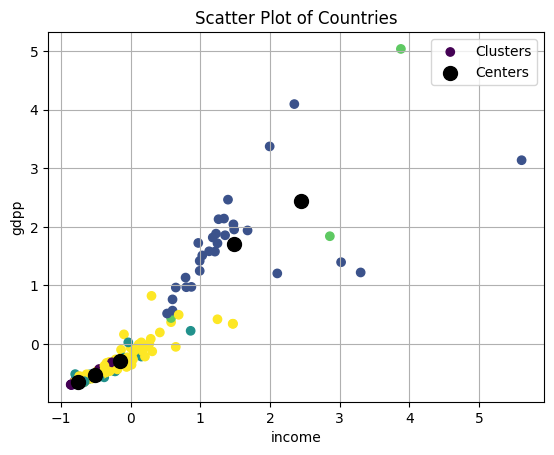

In [8]:
import matplotlib.pyplot as plt

# using income and gdpp to understand how different countries can be clustered
x1_index = 4
x2_index = 8

# plotting a scatter plot
scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')

# plotting the centers
centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Countries')

# generating the legend
plt.legend()

plt.grid()
plt.show()

##### From the graph we can see that there are 5 clusters during our initial plotting of the two features, gdpp and income level of the countries. 

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [9]:
# calculating for the With-in Cluster Sum of Squares for the k-means to check for the amount of clusters
WCSS = []
ks = range(1, 15)
for k in ks:
    kmeans = KMeans(n_clusters = k, n_init = 30, init = 'random').fit(X_scaled)
    kmeans.fit(X_scaled)
    WCSS.append(kmeans.inertia_)

In [10]:
# BONUS OPTIONAL 
#WCSS = KMeans(n_clusters = k, n_init = 30, init = 'random').fit(X_scaled).inertia for k in ks range(1, 15)

# 4.) Use the above work and economic critical thinking to choose a number of clusters.

Text(0, 0.5, 'WCSS')

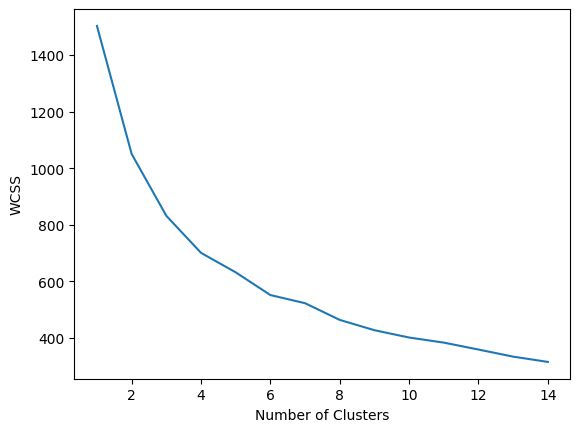

In [11]:
# plotting the With-in Cluster Sum of Squares
plt.plot(ks, WCSS)
plt.xlabel ("Number of Clusters")
plt.ylabel ("WCSS")

##### From the graph, we can see that the optimal level for the number of clusters is around 5. 

# 6.) Do the same for a silhoutte plot

In [12]:
from sklearn.metrics import silhouette_score

In [13]:
# calculating the silhoutte scores for the k-means to check for the amount of clusters
SCs = []
ks = range(2, 15)
for k in ks:
    kmeans = KMeans(n_clusters = k, n_init = 30, init = 'random').fit(X_scaled)
    kmeans.fit(X_scaled)
    label = kmeans.labels_
    SCs.append(silhouette_score(X_scaled, label))

Text(0, 0.5, 'SCs')

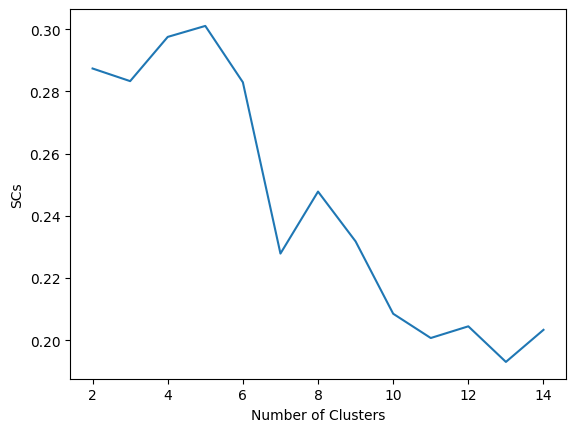

In [14]:
# plotting the Silhoutte Scores
plt.plot(ks, SCs)
plt.xlabel ("Number of Clusters")
plt.ylabel ("SCs")

##### We see a similar trend as compared to the WCSS where the optimal number of clusters are found to be 5.

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

##### Even though the WCSS and SC method provide us with an optimal cluster score of 5, we have decided to use 2 to be the right amount mainly because  we are trying to predict if a country is developed or not developed. In these situations using 5 clusters is not feasible as we only wish to create 2 distinct clusters. Analyzing the level of development in a country would be extremly difficult if we complicate the model and use a higher amount of clusters, so due to economic interpretability and analysis purposes we use 2 clusters. 

In [15]:
# kmeans implementation with 2 clusters
kmeans = KMeans(n_clusters = 2, n_init = 30, init = 'random').fit(X_scaled)

In [16]:
# getting the predictions and converting it to a dataframe 
preds = pd.DataFrame(kmeans.predict(X_scaled))
output = pd.concat(((preds, df)), axis = 1)

In [17]:
# printing the results from the first cluster, the 'not developed'
output
print('Cluster 1:')
list (output.loc[output[0] == 0, 'country'])

Cluster 1:


['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

##### From the clustering we can see that most of the countries in this cluster belong to Asia and Africa with a few exceptions. Which makes sense economically. This is because thes countries are currently in the process of increasing their GDP and since they are not developed, the income levels are relatively on the lower side.  As seen from the first scatter plot, we see that there is a linear trend between these two features, as the countries GDP rises, they have higher levels of income and vice versa, i.e., as the level of income rises, it indicates that there are a higher share of skilled workers and hence they have a higher GDP.

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

##### According to our clustering, the 0 class is for not developed and 1 is for developed countries.

In [18]:
# merging the non scaled data with our predictions
final_data = pd.concat([preds, X], axis = 1)
final_data

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,0,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,0,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,1,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,1,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,0,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [19]:
# checking for the mean values for the clusters 
final_data.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294
1,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798


In [20]:
# checking for the standard deviation for the clusters
final_data.groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189
1,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127


# 9.) Write an observation about the descriptive statistics.

##### Cluster Mean: It is evident that the developed nations are way ahead when we compare the GDP and income levels of the two groups. Which also reflects the fact that they are bound to have a lower inflation rate at an average. It is shocking to see that the imports of the two groups are really close by, as developed countries would be importing raw materials which are unavailable in their countries and in turn exporting the finished goods as they have a higher production levels, which is evident from the significant difference in the export levels of the two clusters. It is surprising to see that the mean health values for the two groups are similar considering the huge difference in the child mortality rates and life expectancy. This might be because a few extreme outliers could be influencing these values heavily affecting the results. Overall, the results are accurate as to how these two clusters would be believed to perform in these economic metrics. 



##### Cluster Standard Deviation: As mentioned above, the vast spread and variation in the child mortality rates is the reason why child mortality rates are so high in cluster 0 (not developed) as the standard deviation is 38, that means the values are scattered further away from the mean. This is also the same reason why we see the extremly high GDP and Income levels for Cluster 1 (developed) because there exist extremly developed countries like the United States of America, UK, China, Japan, Germany and even India. But it is surprising to see India in cluster 0 as it is one of the top 10 countries when talking about GDP right now. Regarding the inflation, we can see that be it developed or not, the countries are spread around the mean. The feature with the lowest spread, i.e., total fertility rates is an indicator of tha fact that developed and not developed countries alike have fertility rates, and the reason why mortality rates are much higher for not developed countries could be because their lower GDP levels as compared to the developed countries. 

##### Overall, we can conclude that descriptive statistics give us a great overview of the clusters. 